Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats as sc
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
import seaborn as sns

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
cd /data

/data


In [13]:
data_ana = pd.read_pickle('/data/ana_naspm')
data_ana

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
127,"{'onset_tau': [0.00044, 0.00044, 0.0004, 0.000...","{'onset_tau': [0.0004, 0.00036, 0.0004, 0.0005...",2017091301,25,"[0, 7, 8, 9, 11, 12]",[]
128,"{'onset_tau': [0.0006, 0.00048, 0.00064, 0.000...","{'onset_tau': [0.0006, 0.00072, 0.00068, 0.000...",2017091202,30,"[2, 43, 49]","[54, 55, 56, 57, 58, 59, 60, 65, 66]"
129,"{'onset_tau': [0.00052, 0.00048, 0.00044, 0.00...","{'onset_tau': [0.00056, 0.00096, 0.00048, 0.00...",2017092702,20,"[2, 15, 22, 29]","[9, 10, 17, 24, 31]"
130,"{'onset_tau': [0.00048, 0.00052, 0.0004, 0.000...","{'onset_tau': [0.00044, 0.00044, 0.0008, 0.000...",2017092901,40,"[0, 9, 13, 14, 15, 19, 21, 22, 24, 26, 29, 30]","[38, 41, 46, 47, 51, 52, 57, 61, 66, 67, 69, 7..."
132,"{'onset_tau': [0.00036, 0.00036, 0.00044, 0.00...","{'onset_tau': [0.0004, 0.00068, 0.00056, 0.000...",2017102501,40,"[2, 8, 12, 18, 34, 48, 51]","[47, 49, 51, 52, 53, 54, 56, 57, 60, 62, 63, 6..."


In [15]:
amp_bef = []
amp_aft = []
onset_tau_bef = []
onset_tau_aft = []
decay_tau_bef = []
decay_tau_aft = []
freq_bef = []
freq_aft = []
data_index = list(data_ana.index)
for i in range(len(data_ana)):
    target = data_index[i]
    psc_naspm_bef = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_before_'+str(target))
    psc_naspm_aft = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_after_'+str(target))
    para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)
    amp_bef.append(para_bef['amp'])
    amp_aft.append(para_aft['amp'])
    onset_tau_bef.append(para_bef['onset_tau'])
    onset_tau_aft.append(para_aft['onset_tau'])
    decay_tau_bef.append(para_bef['decay_tau'])
    decay_tau_aft.append(para_aft['decay_tau'])
    freq_bef.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005])/len(para_bef['decay_tau']))
    freq_aft.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005])/len(para_aft['decay_tau']))
    #freq_bef.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005])/len(para_bef['decay_tau']))
    #freq_aft.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005])/len(para_aft['decay_tau']))
amp_bef = np.hstack(amp_bef)
amp_aft = np.hstack(amp_aft)
onset_tau_bef = np.hstack(onset_tau_bef)
onset_tau_aft = np.hstack(onset_tau_aft)
decay_tau_bef = np.hstack(decay_tau_bef)
decay_tau_aft = np.hstack(decay_tau_aft)

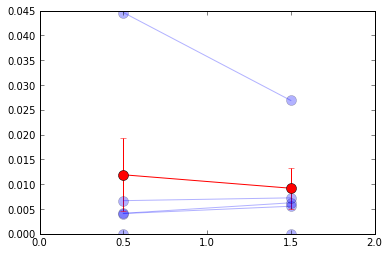

In [16]:
freq_bef_mean = np.mean(freq_bef)
freq_bef_ste = np.std(freq_bef)/np.sqrt(len(freq_bef))
freq_aft_mean = np.mean(freq_aft)
freq_aft_ste = np.std(freq_aft)/np.sqrt(len(freq_aft))

for i, j in zip(freq_bef, freq_aft):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
#plt.ylim([1,6])

with PdfPages('/data/mini_freq_post_2.pdf') as pdf:
    pdf.savefig()

In [17]:
sc.ttest_rel(freq_bef, freq_aft)

Ttest_relResult(statistic=0.71976267747167566, pvalue=0.51148284776468)

(0, 4e-10)

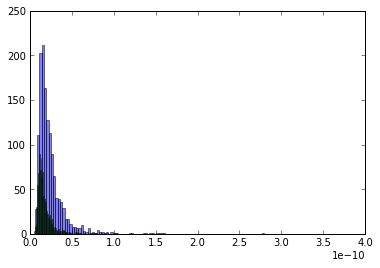

In [18]:
plt.hist(amp_bef, bins=100, alpha=0.5)
plt.hist(amp_aft, bins=100, alpha=0.5)
plt.xlim([0, 4e-10])

RanksumsResult(statistic=13.524607898417921, pvalue=1.1193889819756472e-41)


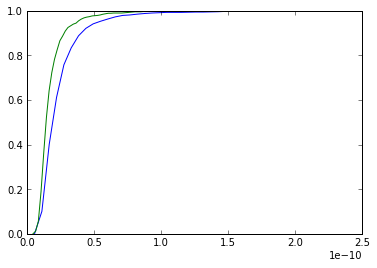

In [19]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(amp_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(amp_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
#plt.xlim([0,1e-10])
print(sc.ranksums(amp_bef, amp_aft))

with PdfPages('/data/anti_hebbian_mini_amp.pdf') as pdf:
    pdf.savefig()

RanksumsResult(statistic=-4.1579637193631331, pvalue=3.2109700367391015e-05)

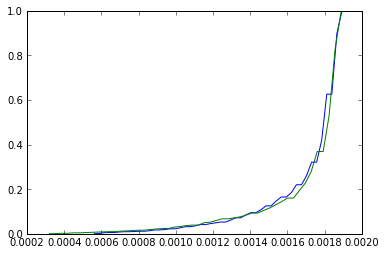

In [20]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(onset_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(onset_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
sc.ranksums(onset_tau_bef, onset_tau_aft)

(array([   2.,    2.,    2.,    3.,    3.,    3.,    5.,    2.,    8.,
           6.,   19.,   11.,   11.,   20.,   23.,   28.,   62.,  131.,
         424.,  160.]),
 array([ 0.00032,  0.0004 ,  0.00048,  0.00056,  0.00064,  0.00072,
         0.0008 ,  0.00088,  0.00096,  0.00104,  0.00112,  0.0012 ,
         0.00128,  0.00136,  0.00144,  0.00152,  0.0016 ,  0.00168,
         0.00176,  0.00184,  0.00192]),
 <a list of 20 Patch objects>)

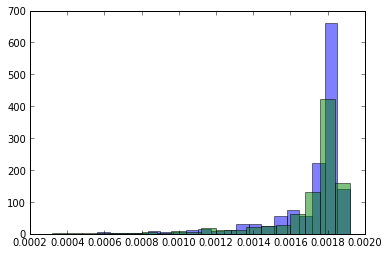

In [21]:
plt.hist(onset_tau_bef, alpha=0.5, bins=20)
plt.hist(onset_tau_aft, alpha=0.5, bins=20)

(0, 0.006)

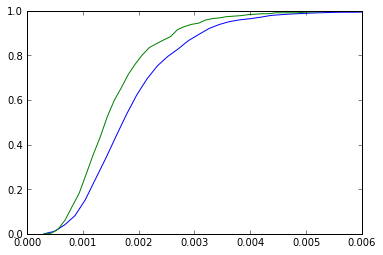

In [22]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(decay_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(decay_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
plt.xlim([0,0.006])

# with PdfPages('/data/low_NASPM_mini_amp.pdf') as pdf:
#     pdf.savefig()

In [23]:
sc.ttest_ind(decay_tau_bef, decay_tau_aft)

Ttest_indResult(statistic=8.309859809563779, pvalue=1.6140897788033911e-16)

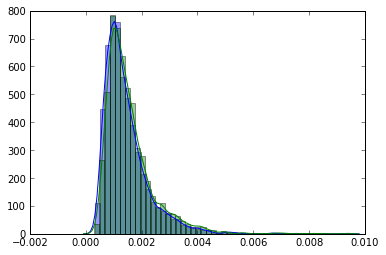

In [48]:
sns.distplot(decay_tau_bef, bins=50)
sns.distplot(decay_tau_aft, bins=50)

In [57]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

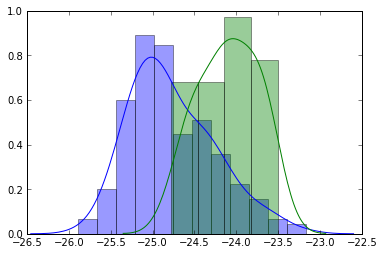

In [43]:
sns.distplot(log_amp_bef)
sns.distplot(np.log(decay_tau_stim_bef))

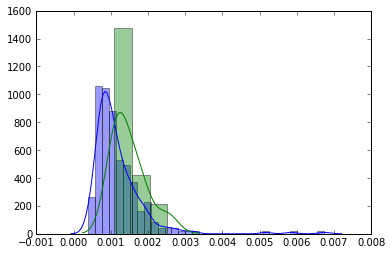

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

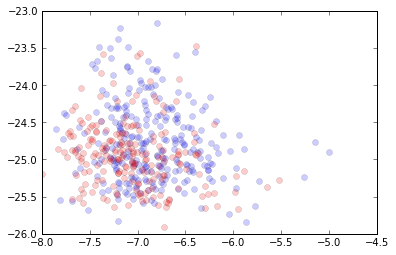

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

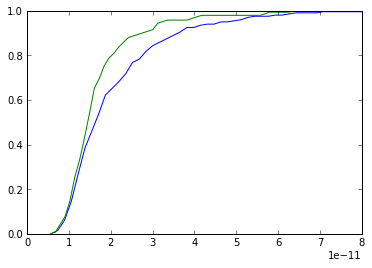

In [48]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

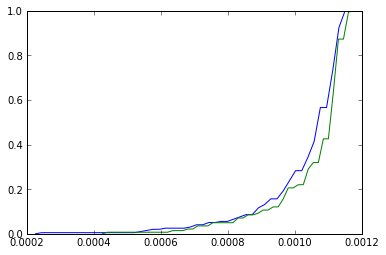

In [49]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['onset_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['onset_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)